*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

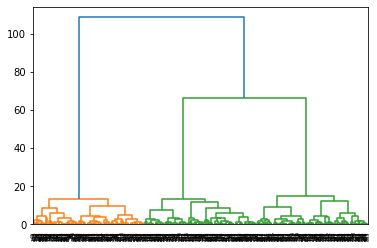

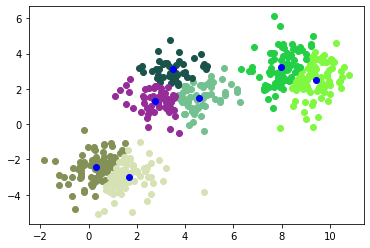

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148 
        X, y = datasets.make_blobs(n_samples=n_samples,
                                   centers=4,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

X = generate_data(500, 1)
klasteri = np.linspace(2, 20, 19, dtype=int)
kri_fun = []

kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(X)
labels = kmeans.predict(X)
dend = dendrogram(linkage(X, method='ward'))

a = X[:, 0]
b = X[:, 1]

plt.figure(2)
for i in range(7):
    x = []
    y = []
    for k in range(500):
        if labels[k] == i:
            x.append(a[k])
            y.append(b[k])

    plt.scatter(x, y, c=np.random.rand(3, ))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue')
plt.show()